## World Happiness Report 2005-2021
Exploring global happiness trends and factors influencing well-being

The World Happiness Report 2008-2021 dataset provides valuable insights into the trends for countries around the world. This data can be used to understand the impact on the happiness levels of people and the overall well-being of a nation.

### About the dataset:

The World Happiness Report datasets consist of several variables, such as:

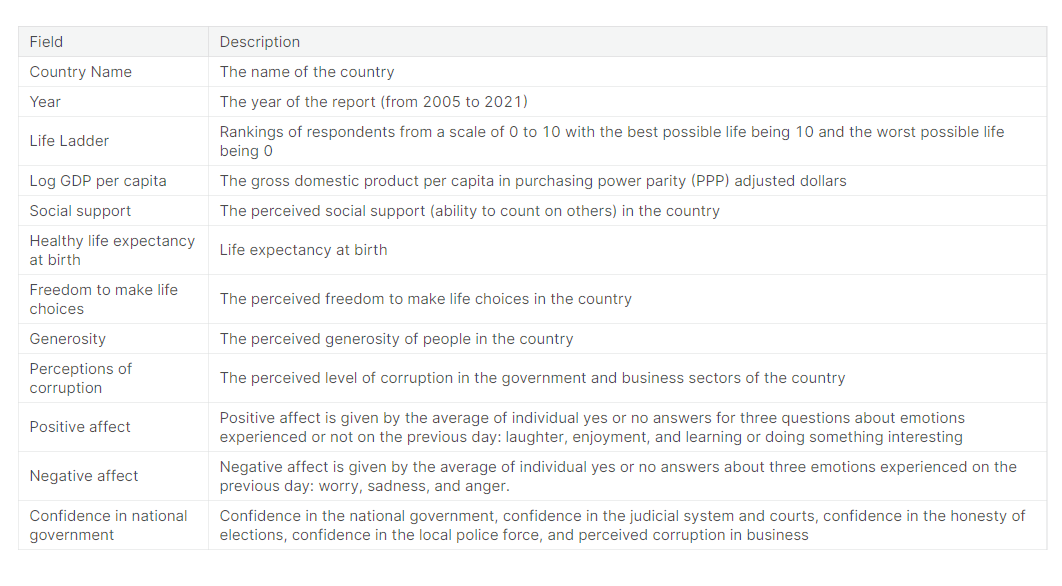

reference: https://www.kaggle.com/datasets/jahaidulislam/world-happiness-report-2005-2021?resource=download
Data Analysis by : Bushra Tasnim Zahed

### Project Goal: 
<p></p>
<li>What are possible actions to improve happiness and well-being in different countries?</li>
<li>Are there any common trends or patterns across these countries in terms of happiness and well-being?</li>
<li>Comparing happiness trends in the United States, Canada and Mexico (3 neighboring countries) during the Pandemic (Year 2019 to 2021)</li>

### Skills covered:
Data Cleaning (dealing with missing values: interpolation, drop columns, imputing with mean; checking duplicates, calculating outliers based on z-score and iqr) exploratory data analysis (statistical summary), Correlation, Univariate analysis, Multivariate analysis

### 1. Importing the Libraries

In [1]:
import warnings
import itertools
import numpy as np
import matplotlib.pyplot as plt
warnings.filterwarnings("ignore")
plt.style.use('fivethirtyeight')
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import matplotlib

#setting up default parameters
plt.rc('axes', labelsize=14)
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rc('text', color='k')


## 2. Loading the data

In [2]:
df = pd.read_csv("World Happiness Report 2005-2021.csv")
df.head()

,Country name,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect,Confidence in national government
0,Afghanistan,2008,3.723590,7.302574,0.450662,50.500000,0.718114,0.173169,0.881686,0.414297,0.258195,0.612072
1,Afghanistan,2009,4.401778,7.472446,0.552308,50.799999,0.678896,0.195469,0.850035,0.481421,0.237092,0.611545
2,Afghanistan,2010,4.758381,7.579183,0.539075,51.099998,0.600127,0.125859,0.706766,0.516907,0.275324,0.299357
3,Afghanistan,2011,3.831719,7.552006,0.521104,51.400002,0.495901,0.167723,0.731109,0.479835,0.267175,0.307386
4,Afghanistan,2012,3.782938,7.637953,0.520637,51.700001,0.530935,0.241247,0.775620,0.613513,0.267919,0.435440


### 3. Exploring the data

In [3]:
df.shape

(2089, 12)

In [4]:
df.dtypes

Country name                          object
Year                                   int64
Life Ladder                          float64
Log GDP per capita                   float64
Social support                       float64
Healthy life expectancy at birth     float64
Freedom to make life choices         float64
Generosity                           float64
Perceptions of corruption            float64
Positive affect                      float64
Negative affect                      float64
Confidence in national government    float64
dtype: object

In [5]:
df.isnull().sum()

Country name                           0
Year                                   0
Life Ladder                            0
Log GDP per capita                    27
Social support                        13
Healthy life expectancy at birth      58
Freedom to make life choices          32
Generosity                            80
Perceptions of corruption            113
Positive affect                       24
Negative affect                       16
Confidence in national government    216
dtype: int64

#### Treating null values

In [6]:
# filling empty cells with mean
df[["Log GDP per capita", "Social support","Freedom to make life choices", "Positive affect","Negative affect"]]=df[["Log GDP per capita", "Social support","Freedom to make life choices", "Positive affect","Negative affect"]].fillna(df.mean())

For columns such as Log GDP per capita, Social support, Freedom to make life choices, Positive affect, and Negative affect filling in missing values with mean can be a reasonable approach. These columns have relatively few missing values, and filling them with the mean may not significantly affect the overall statistics and analysis.

In [7]:
df.isnull().sum()

Country name                           0
Year                                   0
Life Ladder                            0
Log GDP per capita                     0
Social support                         0
Healthy life expectancy at birth      58
Freedom to make life choices           0
Generosity                            80
Perceptions of corruption            113
Positive affect                        0
Negative affect                        0
Confidence in national government    216
dtype: int64

In [8]:
# Drop the 'Confidence in national government' column for the largest missing values
df.drop(['Confidence in national government'], axis=1, inplace=True)

In [9]:
df.isnull().sum()

Country name                          0
Year                                  0
Life Ladder                           0
Log GDP per capita                    0
Social support                        0
Healthy life expectancy at birth     58
Freedom to make life choices          0
Generosity                           80
Perceptions of corruption           113
Positive affect                       0
Negative affect                       0
dtype: int64

##### Investigating the correlation among missing value columns by calculating correlation matrix

In [10]:
correlations = df.corr()
print(correlations["Healthy life expectancy at birth"])

Year                                0.151268
Life Ladder                         0.713795
Log GDP per capita                  0.807137
Social support                      0.596873
Healthy life expectancy at birth    1.000000
Freedom to make life choices        0.367884
Generosity                          0.014261
Perceptions of corruption          -0.294089
Positive affect                     0.221511
Negative affect                    -0.124130
Name: Healthy life expectancy at birth, dtype: float64


In [11]:
print(correlations["Generosity"])

Year                               -0.014956
Life Ladder                         0.187568
Log GDP per capita                 -0.000836
Social support                      0.069625
Healthy life expectancy at birth    0.014261
Freedom to make life choices        0.327126
Generosity                          1.000000
Perceptions of corruption          -0.281094
Positive affect                     0.310528
Negative affect                    -0.086408
Name: Generosity, dtype: float64


In [12]:
print(correlations["Perceptions of corruption"])

Year                               -0.077258
Life Ladder                        -0.429346
Log GDP per capita                 -0.341149
Social support                     -0.222278
Healthy life expectancy at birth   -0.294089
Freedom to make life choices       -0.479332
Generosity                         -0.281094
Perceptions of corruption           1.000000
Positive affect                    -0.279470
Negative affect                     0.267072
Name: Perceptions of corruption, dtype: float64


Based on the correlation coefficients between "Healthy life expectancy at birth", "Generosity", "Perceptions of corruption" and the other columns in the dataset suggest a moderate to strong positive correlation with some columns, indicating the need for a more robust interpolation method like spline or polynomial interpolation. 

In [13]:
from scipy.interpolate import interp1d
# Select columns to interpolate
cols_to_interpolate = ['Healthy life expectancy at birth', 'Generosity', 'Perceptions of corruption']

# Loop over selected columns
for col in cols_to_interpolate:
    # Get indices of missing values
    missing_vals = df[col].isnull()
    missing_vals_idx = missing_vals.index[missing_vals]
    
    # Get indices of non-missing values
    non_missing_vals_idx = np.arange(len(df[col]))[~missing_vals]
    
    # Use polynomial interpolation to fill in missing values
    poly_coeffs = np.polyfit(non_missing_vals_idx, df[col][~missing_vals], deg=2)
    poly = np.poly1d(poly_coeffs)
    df[col][missing_vals_idx] = poly(missing_vals_idx)

In [14]:
df.isnull().sum()

Country name                        0
Year                                0
Life Ladder                         0
Log GDP per capita                  0
Social support                      0
Healthy life expectancy at birth    0
Freedom to make life choices        0
Generosity                          0
Perceptions of corruption           0
Positive affect                     0
Negative affect                     0
dtype: int64

In [15]:
df.shape

(2089, 11)

#### Checking duplicates

In [16]:
# counting duplicate rows
duplicate_rows = df.duplicated(keep=False).sum()

# printing the number of duplicate rows
print(f"There are {duplicate_rows} duplicate rows.")

There are 0 duplicate rows.


In [17]:
# counting duplicate columns
duplicate_cols = df.transpose().duplicated(keep=False).sum()

# printing the number of duplicate columns
print(f"There are {duplicate_cols} duplicate columns.")

There are 0 duplicate columns.


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2089 non-null   object 
 1   Year                              2089 non-null   int64  
 2   Life Ladder                       2089 non-null   float64
 3   Log GDP per capita                2089 non-null   float64
 4   Social support                    2089 non-null   float64
 5   Healthy life expectancy at birth  2089 non-null   float64
 6   Freedom to make life choices      2089 non-null   float64
 7   Generosity                        2089 non-null   float64
 8   Perceptions of corruption         2089 non-null   float64
 9   Positive affect                   2089 non-null   float64
 10  Negative affect                   2089 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 179.6+ KB


#### Statistical summary

In [19]:
df.describe()

,Year,Life Ladder,Log GDP per capita,Social support,Healthy life expectancy at birth,Freedom to make life choices,Generosity,Perceptions of corruption,Positive affect,Negative affect
count,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000,2089.000000
mean,2013.727621,5.473747,9.378408,0.811542,63.182374,0.745462,0.000190,0.746344,0.651421,0.270544
std,4.455614,1.115567,1.136102,0.118564,6.851468,0.139668,0.158002,0.181043,0.105344,0.085520
min,2005.000000,2.178809,5.526723,0.290184,6.720000,0.257534,-0.335739,0.035198,0.178886,0.082737
25%,2010.000000,4.651972,8.482665,0.748304,59.340000,0.654182,-0.107844,0.698431,0.570538,0.208130
50%,2014.000000,5.405246,9.450546,0.833975,64.760002,0.764352,-0.018024,0.792530,0.660928,0.261133
75%,2017.000000,6.294282,10.342994,0.904569,68.224998,0.856025,0.085265,0.866777,0.736459,0.321357
max,2021.000000,8.018934,11.665803,0.987343,74.349998,0.985178,0.706377,0.983276,0.883586,0.704590


The descriptive summary provides information about the central tendency, variability, and distribution of the variables in the dataset. Here are some explanations of the different parts of the summary:

count: The number of non-missing values for each variable in the dataset. In this case, there are 2089 observations for all variables.

mean: The arithmetic average of each variable in the dataset. For example, the mean "Life Ladder" score is 5.47, indicating that the average reported life satisfaction score across all countries and years is around 5.47 out of 10.

std: The standard deviation of each variable, which measures the spread or variability of the data. A larger standard deviation indicates that the data is more spread out from the mean.

min/max: The minimum and maximum values observed for each variable.

quartiles: The 25th, 50th (median), and 75th percentiles of each variable. The median divides the data into two halves, with 50% of the data above and 50% below.

Overall, the summary provides a general sense of the range and distribution of the variables in the dataset. However, it is important to note that the summary statistics do not provide information about potential outliers, missing data, or the underlying distributional assumptions of the variables. Further analysis may be necessary to gain a deeper understanding of the data.

#### Calculating outliers using z-score

In [20]:
def detect_outliers_zscore(df, threshold=3):
    # calculate z-score for each column
    zscores = (np.abs((df - df.mean()) / df.std()))
    
    # flag outliers using threshold
    outliers = zscores > threshold
    
    return outliers

# apply the function to the dataset
outliers = detect_outliers_zscore(df)

# count the number of outliers in each column
num_outliers = outliers.sum()

# print the result
print(num_outliers)

Country name                         0
Freedom to make life choices         8
Generosity                          20
Healthy life expectancy at birth    12
Life Ladder                          0
Log GDP per capita                   3
Negative affect                     17
Perceptions of corruption           37
Positive affect                      6
Social support                      20
Year                                 0
dtype: int64


#### Calculating outliers using interquartile range (IQR)

In [21]:
def detect_outliers_iqr(df, threshold=1.5):
    # calculate IQR for each column
    Q1 = df.quantile(0.25)
    Q3 = df.quantile(0.75)
    IQR = Q3 - Q1
    
    # flag outliers using threshold
    lower_threshold = Q1 - threshold * IQR
    upper_threshold = Q3 + threshold * IQR
    outliers = (df < lower_threshold) | (df > upper_threshold)
    
    return outliers

# apply the function to the dataset
outliers = detect_outliers_iqr(df)

# count the number of outliers in each column
num_outliers = outliers.sum()

# print the result
print(num_outliers)

Country name                          0
Freedom to make life choices         14
Generosity                           42
Healthy life expectancy at birth     26
Life Ladder                           1
Log GDP per capita                    1
Negative affect                      31
Perceptions of corruption           202
Positive affect                       4
Social support                       46
Year                                  0
dtype: int64


Using z-scores and IQR can give different numbers of outliers for the same dataset because they are different statistical methods that use different criteria to define outliers.

The z-score method detects outliers based on the number of standard deviations a data point is away from the mean. It assumes that the data is normally distributed and uses a fixed threshold of a certain number of standard deviations (e.g., 3) to determine outliers. This means that if the data is not normally distributed or if there are extreme values (e.g., very large or very small), the z-score method may detect more or fewer outliers than expected.

On the other hand, the IQR method detects outliers based on the range between the first and third quartiles of the data. It uses a variable threshold of a certain multiple of the IQR (e.g., 1.5) to determine outliers. This means that the IQR method is more robust to extreme values and non-normal distributions, as it only looks at the middle 50% of the data and does not rely on assumptions about the distribution.

The choice of method depends on the specific characteristics of the data and the research question at hand. It's always a good practice to use multiple methods to detect outliers and to investigate any discrepancies that arise.

#### Exploring the outliers further plotting histograms

Outliers in column Perceptions of corruption:


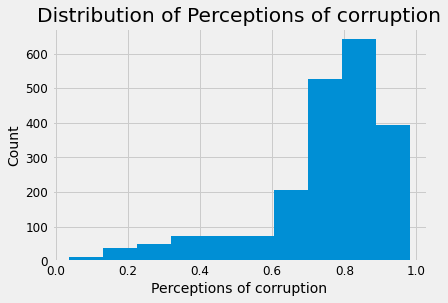

In [22]:
def investigate_outliers(df, column):
    # get the values of the outlier data points
    outliers = df.loc[df[column] > df[column].mean() + 3 * df[column].std(), column]
    
    # print the outlier values and their corresponding country names
    print(f"Outliers in column {column}:")
    for index, value in outliers.items():
        country_name = df.loc[index, 'Country name']
        print(f"{country_name}: {value}")
    
    # plot the distribution of the column to visualize the outliers
    df[column].plot(kind='hist', bins=10)
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.title(f"Distribution of {column}")
    plt.show()

# investigate outliers in the 'Perceptions of corruption' column
investigate_outliers(df, 'Perceptions of corruption')


Outliers in column Social support:


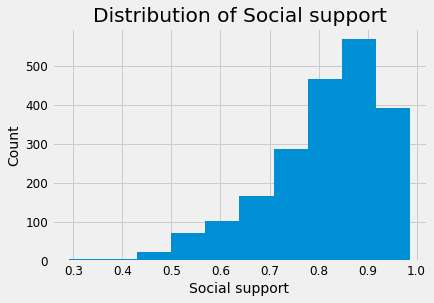

In [23]:
investigate_outliers(df, 'Social support')

In [24]:
df["Social support"].describe()

count    2089.000000
mean        0.811542
std         0.118564
min         0.290184
25%         0.748304
50%         0.833975
75%         0.904569
max         0.987343
Name: Social support, dtype: float64

As expected the values are skewed and not normally distributed. Let's ignore the outliers for now, considering them to be valid datapoints.

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2089 entries, 0 to 2088
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country name                      2089 non-null   object 
 1   Year                              2089 non-null   int64  
 2   Life Ladder                       2089 non-null   float64
 3   Log GDP per capita                2089 non-null   float64
 4   Social support                    2089 non-null   float64
 5   Healthy life expectancy at birth  2089 non-null   float64
 6   Freedom to make life choices      2089 non-null   float64
 7   Generosity                        2089 non-null   float64
 8   Perceptions of corruption         2089 non-null   float64
 9   Positive affect                   2089 non-null   float64
 10  Negative affect                   2089 non-null   float64
dtypes: float64(9), int64(1), object(1)
memory usage: 179.6+ KB


### 4. What are possible actions to improve happiness and well-being in different countries?

In [31]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# defining a function to treat outliers by scaling the data
def scale_data(df, column):
    ##Scale a column in a dataframe to treat outliers.
    scaler = MinMaxScaler()
    df[column] = scaler.fit_transform(df[[column]])
    return df
outlier_columns = ['Freedom to make life choices', 'Generosity', 'Healthy life expectancy at birth',
                   'Log GDP per capita', 'Negative affect', 'Perceptions of corruption', 'Positive affect',
                   'Social support']
for col in outlier_columns:
    df =scale_data(df, col)

# calculating the mean happiness score for each country
mean_scores = df.groupby('Country name')['Life Ladder'].mean().sort_values(ascending=False)
# calculating the correlation between the happiness score and other factors
correlations = df.corr()['Life Ladder'].sort_values(ascending=False)

# print the top correlations
print('Top Correlations with Life Ladder (Happiness Score):\n')
print(correlations.head(10))


Top Correlations with Life Ladder (Happiness Score):

Life Ladder                         1.000000
Log GDP per capita                  0.776577
Social support                      0.711592
Healthy life expectancy at birth    0.710421
Freedom to make life choices        0.529276
Positive affect                     0.508559
Generosity                          0.183321
Year                                0.041821
Negative affect                    -0.317213
Perceptions of corruption          -0.422243
Name: Life Ladder, dtype: float64


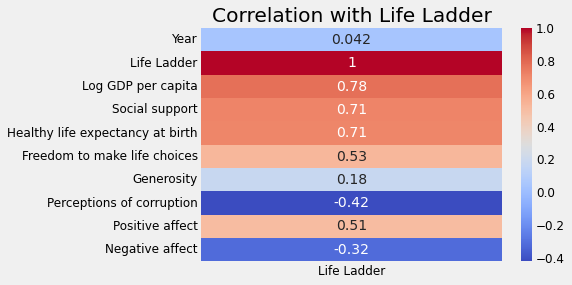

In [32]:
corr_matrix = df.corr()

# select only the correlations with Life Ladder
corr_with_life_ladder = corr_matrix["Life Ladder"]

# plot the heatmap
sns.heatmap(corr_with_life_ladder.to_frame(), cmap="coolwarm", annot=True)
plt.title("Correlation with Life Ladder")
plt.show()

### Observation
This is a correlation matrix showing the correlation coefficients between Life Ladder (Happiness Score) and other variables in the dataset. A correlation coefficient ranges from -1 to 1, with values closer to 1 indicating a strong positive correlation and values closer to -1 indicating a strong negative correlation. A value of 0 indicates no correlation.

##### The top five variables that are positively correlated with Life Ladder 

The highest positive correlation is with Log GDP per capita, indicating that countries with higher GDP per capita tend to have higher levels of happiness and well-being. The second highest positive correlation is with Social support, indicating that individuals who have stronger social networks and support tend to report higher levels of happiness and well-being. The third highest positive correlation is with Healthy life expectancy at birth, indicating that countries with higher life expectancies tend to have higher levels of happiness and well-being.Freedom to make life choices, Positive affect, and Generosity also have positive correlations with the Life Ladder score, although they are not as strong as the previous three variables. This suggests that having personal freedoms, positive emotions, and generous behavior can also contribute to overall happiness and well-being.

On the other hand, Negative affect and Perceptions of corruption have negative correlations with the Life Ladder score, indicating that individuals who experience negative emotions and who perceive their government to be corrupt tend to report lower levels of happiness and well-being.

##### Recommendations
Based on these findings, recommendations to improve happiness and well-being in different countries could include promoting economic development and reducing income inequality, fostering strong social networks and support systems, improving healthcare and public health, protecting personal freedoms, promoting positive emotions and behaviors, and reducing corruption and negative experiences.





### 5. Life Ladder (Happiness score) Analysis for countries from 2005 to 2021 
Investigating whether there are any common trends or patterns across these countries in terms of happiness and well-being?
Let's use boolean indexing to select only the countries from the Country name column that have data from the Year column 2005 to 2021.

In [45]:
# create a boolean mask for the rows with year between 2005 and 2021
year_mask = (df["Year"] >= 2005) & (df["Year"] <= 2021)

# selecting only the rows that satisfy the mask
df_filtered = df[year_mask]

# selecting only the "Country name" column of the filtered dataframe
countries = df_filtered["Country name"].unique()

# print the list of countries
print("The number of countries that has data from 2005 to 2021 is {}".format(len(countries)))
print()
print(countries)

The number of countries that has data from 2005 to 2021 is 166

['Afghanistan' 'Albania' 'Algeria' 'Angola' 'Argentina' 'Armenia'
 'Australia' 'Austria' 'Azerbaijan' 'Bahrain' 'Bangladesh' 'Belarus'
 'Belgium' 'Belize' 'Benin' 'Bhutan' 'Bolivia' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'Bulgaria' 'Burkina Faso' 'Burundi' 'Cambodia'
 'Cameroon' 'Canada' 'Central African Republic' 'Chad' 'Chile' 'China'
 'Colombia' 'Comoros' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
 'Costa Rica' 'Croatia' 'Cuba' 'Cyprus' 'Czechia' 'Denmark' 'Djibouti'
 'Dominican Republic' 'Ecuador' 'Egypt' 'El Salvador' 'Estonia' 'Eswatini'
 'Ethiopia' 'Finland' 'France' 'Gabon' 'Gambia' 'Georgia' 'Germany'
 'Ghana' 'Greece' 'Guatemala' 'Guinea' 'Guyana' 'Haiti' 'Honduras'
 'Hong Kong S.A.R. of China' 'Hungary' 'Iceland' 'India' 'Indonesia'
 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Ivory Coast' 'Jamaica' 'Japan'
 'Jordan' 'Kazakhstan' 'Kenya' 'Kosovo' 'Kuwait' 'Kyrgyzstan' 'Laos'
 'Latvia' 'Lebanon' 'Lesotho' 'Lib

In [58]:
# count the number of occurrences of each country
country_counts = df["Country name"].value_counts()

# select only the countries with a count of 16
selected_countries = country_counts[country_counts == 16].index

# filter the dataframe to only include selected countries
df_selected = df[df["Country name"].isin(selected_countries)]

In [59]:
df_selected["Country name"].value_counts()

Argentina             16
Bolivia               16
Mexico                16
Moldova               16
Nepal                 16
Nicaragua             16
Pakistan              16
Peru                  16
Philippines           16
Russia                16
Saudi Arabia          16
Senegal               16
South Africa          16
South Korea           16
Spain                 16
Sweden                16
Tajikistan            16
Tanzania              16
Thailand              16
Turkey                16
Uganda                16
Ukraine               16
United Kingdom        16
United States         16
Uruguay               16
Venezuela             16
Vietnam               16
Lithuania             16
Lebanon               16
Kyrgyzstan            16
Egypt                 16
Brazil                16
Cambodia              16
Cameroon              16
Canada                16
Chile                 16
China                 16
Colombia              16
Costa Rica            16
Denmark               16


In [62]:
print("There are {} numbers of countries which has data during 2005 to 2021 (16 years).".format(len(df_selected['Country name'].unique())))

There are 56 numbers of countries which has data during 2005 to 2021 (16 years).


#### Ceating a line plot showing the average happiness score for each year to find common trends or patterns across the selected countries

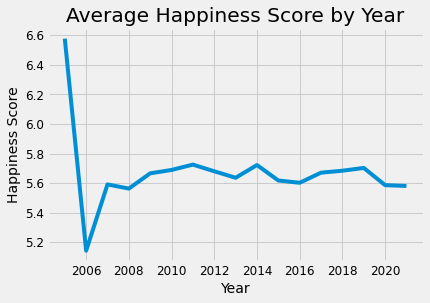

In [71]:
# grouping the selected dataframe by year and calculate the mean happiness score for each year
yearly_mean = df_selected.groupby("Year")["Life Ladder"].mean()

# create a line plot of the yearly mean happiness score
plt.plot(yearly_mean.index, yearly_mean.values)
plt.title("Average Happiness Score by Year")
plt.xlabel("Year")
plt.ylabel("Happiness Score")
plt.show()


In [70]:
print(yearly_mean.sort_values(ascending=False))

Year
2005    6.577552
2011    5.725035
2014    5.722088
2019    5.702523
2010    5.688744
2018    5.683511
2012    5.679889
2017    5.670547
2009    5.665979
2013    5.635964
2015    5.617474
2016    5.602087
2007    5.590892
2020    5.586028
2021    5.580327
2008    5.562763
2006    5.142399
Name: Life Ladder, dtype: float64


### Observation :
The output shows the average Happiness Score (Life Ladder) for each year in descending order from 2005 to 2021. The highest average Happiness Score was recorded in 2005 with a value of 6.577552, while the lowest was recorded in 2006 with a value of 5.142399. There appears to be some fluctuation in the Happiness Scores over the years, but the trend seems to be relatively stable with a slight increase from 2014 to 2019 before a slight decrease in 2020 and 2021. It's also worth noting that the COVID-19 pandemic may have had an impact on the Life Ladder scores in 2020 and 2021, as many countries experienced disruptions to daily life and economic instability.

## 7. Comparing happiness trends among the United States, Canada and Mexico 
Investigating the happiness trends in the United States, Canada and Mexico (3 neighboring countries) and the factors contributing to increasing or decreasing happiness

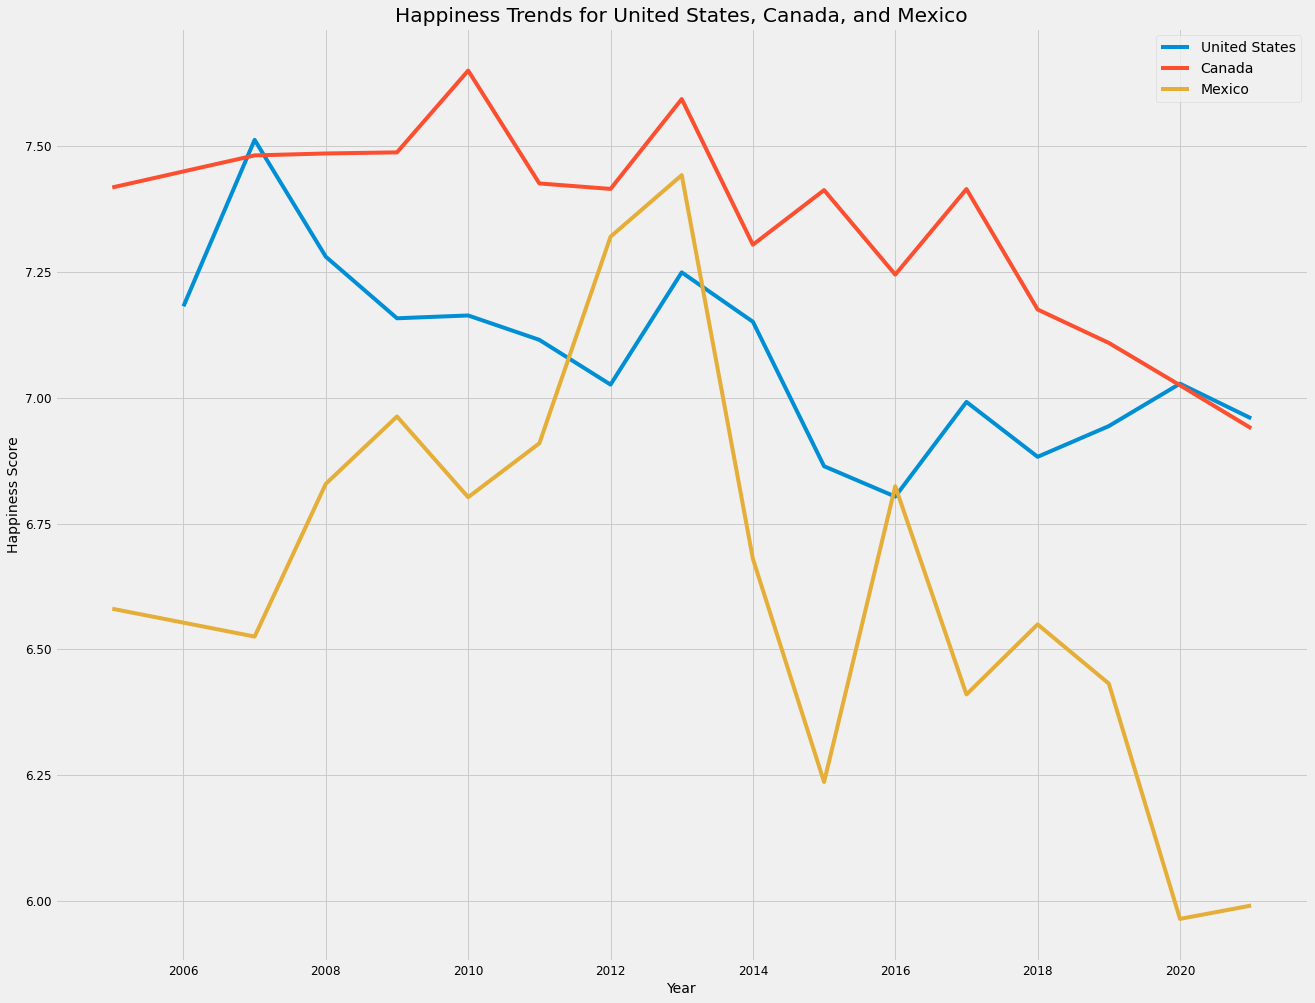

In [74]:
# filtering the dataframe to only include the United States, Canada, and Mexico
countries_of_interest = ["United States", "Canada", "Mexico"]
df_selected = df[(df["Country name"].isin(countries_of_interest)) & (df["Year"] >= 2005)]

# plot the trend of happiness score for each country
fig, ax = plt.subplots(figsize=(20,16))
for country in countries_of_interest:
    data = df_selected[df_selected["Country name"] == country]
    ax.plot(data["Year"], data["Life Ladder"], label=country)
ax.legend()
ax.set_xlabel("Year")
ax.set_ylabel("Happiness Score")
ax.set_title("Happiness Trends for United States, Canada, and Mexico")

plt.show()

In [87]:
for country in countries_of_interest:
    data = df_selected[df_selected["Country name"] == country]
    print(data[['Year','Life Ladder', 'Country name']])

      Year  Life Ladder   Country name
1967  2006     7.181794  United States
1968  2007     7.512688  United States
1969  2008     7.280386  United States
1970  2009     7.158032  United States
1971  2010     7.163616  United States
1972  2011     7.115139  United States
1973  2012     7.026227  United States
1974  2013     7.249285  United States
1975  2014     7.151114  United States
1976  2015     6.863947  United States
1977  2016     6.803600  United States
1978  2017     6.991759  United States
1979  2018     6.882685  United States
1980  2019     6.943701  United States
1981  2020     7.028088  United States
1982  2021     6.959088  United States
     Year  Life Ladder Country name
310  2005     7.418048       Canada
311  2007     7.481753       Canada
312  2008     7.485604       Canada
313  2009     7.487824       Canada
314  2010     7.650346       Canada
315  2011     7.426054       Canada
316  2012     7.415144       Canada
317  2013     7.593794       Canada
318  2014    

#### Observation :
The above data shows the "Life Ladder" score for three countries - United States, Canada, and Mexico - for the years 2005 to 2021. The Life Ladder score is a measure of subjective well-being and is based on survey responses to questions about life satisfaction. The score ranges from 0 to 10, with 10 representing the highest level of life satisfaction.

For the United States, the Life Ladder score remained relatively stable from 2006 to 2011, with a slight decrease in 2015 and 2016, before increasing again in 2017 and 2018. The score then remained relatively stable again from 2019 to 2021.

For Canada, the Life Ladder score remained relatively stable from 2005 to 2009 before increasing in 2010 and remaining relatively stable again from 2011 to 2019. The score then decreased slightly in 2018 and 2021.

For Mexico, the Life Ladder score decreased slightly from 2005 to 2007 before increasing in 2008 and 2009. The score then remained relatively stable from 2010 to 2012 before increasing again in 2013. The score then decreased in 2014 and 2015 before increasing again in 2016. The score then decreased again in 2017 before increasing slightly in 2018. However, the score decreased significantly in 2020 and 2021 before increasing slightly again in 2021. Overall, the Life Ladder score for Mexico has been lower than that of the United States and Canada over the entire period.

#### In terms of Covid Years (Pandemic)
The data provided shows the Life Ladder scores for three North American countries - United States, Canada, and Mexico - during the years 2019 to 2021, which includes the COVID-19 pandemic period.

Looking at the data, we can see that Mexico had the lowest Life Ladder score in all three years, with a score of 6.43 in 2019, 5.96 in 2020, and 5.99 in 2021. This suggests that the COVID-19 pandemic has had a significant negative impact on the overall well-being of people in Mexico.

In comparison, Canada and the United States had higher Life Ladder scores than Mexico, but still experienced some decline in their scores during the pandemic. In Canada, the score decreased from 7.11 in 2019 to 7.02 in 2020 and then further to 6.94 in 2021. Similarly, the United States' score decreased from 6.94 in 2019 to 6.96 in 2020, before declining further to 6.96 in 2021.

Overall, the comparison during the COVID-19 years suggests that the pandemic had a negative impact on people's well-being in all three countries, with the United States and Canada experiencing a decline in Life Ladder scores, while Mexico experienced a further decline.the data suggests that the COVID-19 pandemic has had a negative impact on the well-being of people in North America, with Mexico being the most severely affected, followed by Canada and the United States.